In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CIENCIA DE DATOS: DATOS ESCALADOS CON PYTHON

**¿Cómo es el escalado de variables?**

  +La columna con el nombre de altura tendrá datos en centímetros  y la columna con el nombre peso tendrán datos en Kilogramos

  + **Escalar datos** es el proceso de aumentar o disminuir la magnitud de acuerdo con una proporción fija, en palabras más simples, cambia el tamaño pero no la forma de los datos.

**¿ Por qué necesitamos usar el escalado de variables?**
  + Ayuda a manejar las disparidades en las unidades entre variables. En procesos largos ayuda a reducir los gastos computacionales.

  + En el mundo del ML ayuda a mejorar el rendimiento del modelo y reduce los valores para que no varíen mucho.

**DIFERRENTES TIPOS DE ESCALADO**

  + Escalado Centrado

  + Escalado Estandarización

  + Escalado Normalización

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# **ESCALADO CENTRADO**

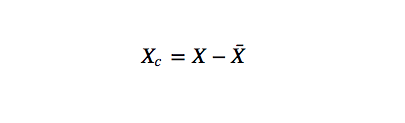

In [ ]:
# Importamos CSV

baseball = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/ Sprint 9 - Correlation, Feature Scaling & Feature Engineering/Practise/Data/weight-height.csv')
baseball_copy = baseball.copy()
baseball.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
baseball.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [ ]:
baseball.shape

(10000, 3)

In [ ]:

weight = baseball['Weight'].values
y = weight.reshape((10000,1))

print('Nuestra variable endógena:',weight,'\n')

height = baseball['Height'].values
x = height.reshape((10000,1))

print(height)

Nuestra variable endógena: [241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268] 

[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]


In [ ]:
print(np.mean(baseball.Height))

66.36755975482106


In [ ]:
# Regresión lineal entre Y (variable independiente) e X (variable dependiente)
linreg = LinearRegression()
linreg.fit(x,y)

print('Intercept:', linreg.intercept_)
print('Height coef:', linreg.coef_)


Intercept: [-350.73719181]
Height coef: [[7.71728764]]


La intersección es -350, eso no quiere decir que cuando un jugador de beisbol tien una altura de 0 pulgadas, su peso será de -350.

Para eliminar la mala interpretación usaremos el centrado:

    + centrado de la variable altura = Cada valor de la variable altura - la media de la variable altura


In [ ]:
# Aplicacion
baseball['Height'] = baseball['Height'] - baseball['Height'].mean()

print(baseball['Height'],'\n')

centrado_alturaBaseball = baseball['Height'].values
x_centrada = centrado_alturaBaseball.reshape((10000,1))


# Modelo Regresion Lineal con la altura de los jugadores 'centrada'
linreg = LinearRegression()
linreg.fit(x_centrada, y)
print('Intercept:', linreg.intercept_)
print('Height centered coef:', linreg.coef_)


0       7.479457
1       2.414344
2       7.742546
3       5.363419
4       3.514236
          ...   
9995   -0.194908
9996    0.699595
9997   -2.499568
9998    2.666683
9999   -4.423314
Name: Height, Length: 10000, dtype: float64 

Intercept: [161.44035683]
Height centered coef: [[7.71728764]]


Ahora podemos conseguir una interpretación más lógica gracias al centrado. La intersección es de 161,44, este es el peso estimado de un jugador de béisbol con una altura media de 66,36 pulgadas. 

# **Estandarización**

El método más usado de escalado es la estandarización, en este método centramos los datso y luego le dividimos por la desviación estándar para hacer cumplir que la desviación estándar de la variable es 1

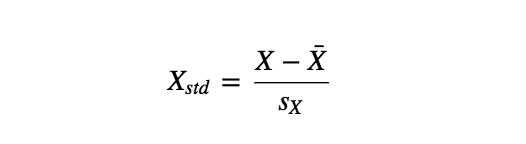

**COSAS A TENER EN CUENTA CON LA ESTANDARIZACIÓN:**

  + Las interesecciones se interpretan como la estimación cuando todos los predictores estan en su valor medio

  + Los coeficientes estan en unidades de desviación estándar de los predictores originales. Esto permite la comparación directa de la magnitud del impacto entre diferentes predictores.

  + Los métodos de optimización ( minimizar la pérdida al máximo) son más rápidos y estables

  + Se requiere para las penalizaciones de regularización donde la magnitud de los coeficientes para diferentes predictores deben tener el mismo significado

  + Los métodos de k-vecinos más cercanos, es necesario si se desea que las variables contribuyan por igual, ya que estos modelos usan la distancia entre las observaciones calculada a partir de las variables.

  + El agrupamiento de k-means se ve afectado por la escala de los datos y la estandarización de las variables evitará que las variables dominen simplemente en función de su escala.

  + En la regressión logística, las redes neuronales y las máquinas de vectores de soporte, los datos sin escalar pueden provocar un efecto desproporcionado de algunos puntos de datos sobre datos.

In [ ]:
# Antes de estandarizar

print(baseball_copy[['Height','Weight']].values,'\n')


# Inicializamos el Escalar
funcion_escalar = StandardScaler()

# Ajustar los datos usando el Escalar (Scale the data)
# Xstd ->  Devolvera la matriz del peso y la altura estandarizadas
Xstd = funcion_escalar.fit_transform(baseball_copy[['Height','Weight']].values)
print('La matrix estandarizada es la siguiente:\n', Xstd, '\n')
print('La media estandarizada es:', Xstd.mean(),'\n')
print('La SD estandarizada es:', Xstd.std(),'\n')



[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]] 

La matrix estandarizada es la siguiente:
 [[ 1.94406149  2.50579697]
 [ 0.62753668  0.02710064]
 [ 2.01244346  1.59780623]
 ...
 [-0.64968792 -1.02672965]
 [ 0.69312469  0.07512745]
 [-1.14970831 -1.48850724]] 

La media estandarizada es: 3.410605131648481e-16 

La SD estandarizada es: 1.0 



In [ ]:
# Modelo de regresion con las variables estandarizadas

# estandarización de la variable 'altura'
Xstd_height = funcion_escalar.fit_transform(baseball_copy[['Height']].values)
print('La matrix estandarizada para la variable edad es la siguiente:\n', Xstd_height, '\n')

# Como afecta la altura al peso de un jugador de beisbol
regresionlineal = LinearRegression()
regresionlineal.fit(Xstd_height, baseball_copy['Weight'].values)
print('Intercept:', regresionlineal.intercept_)
print('coef:', regresionlineal.coef_)

La matrix estandarizada para la variable edad es la siguiente:
 [[ 1.94406149]
 [ 0.62753668]
 [ 2.01244346]
 ...
 [-0.64968792]
 [ 0.69312469]
 [-1.14970831]] 

Intercept: 161.44035683283076
coef: [29.69099655]


**INTERPRETACION**

Para un aumento de 1 desviación estándar en la variable altura se estima un incremento del peso en 29.69 kg. Logicamente no tiene sentido.

Si tuvieramos otra variable como la edad podriamos aplicar el siguiente código: 

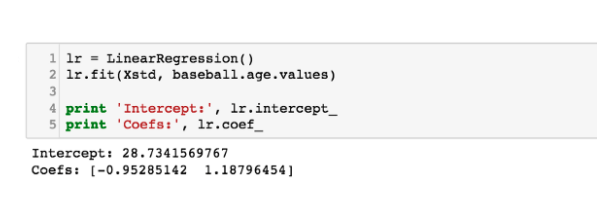

En este caso tenemos las variables altura y peso del Dataset estandarizadas y queremos ver como afectan estas variables a la variable edad:

  + Obtenemos un coeficiente de -0,95 referente a la altura. Este coeficiente se interpreta como un incremento en la SD en una unidad se reduce la edad en -0,95 años

  + Obtenemos un coeficiente de 1,18 referente al peso. Este coeficiente se interpreta como un incremento en la SD en una unidad incrementa la edad en 1,18 años

  Facilita la comparación de diferentes medidas d cantidad entre sí

# **Normalizacion**

La normalización se refiere al proceso de normalizar una varaible para que esté entre 0 y 1. APLASTAR UNA VARIABLE PARA QUE ESTE RESTRINGIDA A UN RANGO ESPECÍFICO. 

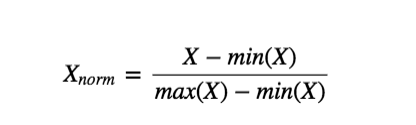

**BENEFICIOS DE LA NORMALIZACION**

Por norma general se prefiere la estandarización a la normalización, pero hay algunas aplicaciones en las que es preferible normalizar:

  + Las redes neuronales a menudo se requiere que sus entradas estén limitadas entre 0 y 1

  + En las imágenes, por ejemplo, donde los píxeles solo pueden adoptar un rango específico de valores RGB, es posible que los datos deban normalizarse



In [ ]:
# Normalizamos la variable altura y peso

x = baseball[['Height', 'Weight']]

minmaxscaler = MinMaxScaler()
normalizacion_de_variables = minmaxscaler.fit_transform(x)

print(normalizacion_de_variables)

[[0.79172838 0.863139  ]
 [0.58695829 0.4754764 ]
 [0.8023644  0.72113127]
 ...
 [0.38830089 0.31065968]
 [0.59715974 0.48298768]
 [0.31052854 0.23843869]]


In [ ]:
# Miramos el mínimo y el máximo de cada variable (altura y peso)

print(normalizacion_de_variables.min(axis = 0))
print(normalizacion_de_variables.max(axis = 0))

[0. 0.]
[1. 1.]


In [ ]:
# Desviación estandar para la variable altura y peso

print(normalizacion_de_variables.std(axis = 0))

[0.15553835 0.15639778]
